In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

In [22]:
eeg_dataset = ".\eeg_dataset_new.csv"
df = pd.read_csv(eeg_dataset)
df

,F7,F3,P7,O1,O2,P8,AF4,state
0,3804.102564,5210.769231,4490.769231,3862.051282,3511.794872,4321.025641,4024.102564,focussed
1,3796.410256,5205.641026,4489.230769,3858.461538,3505.128205,4311.794872,4017.948718,focussed
2,3798.974359,5207.179487,4489.230769,3865.128205,3511.794872,4313.846154,4018.974359,focussed
3,3801.538462,5210.256410,4490.256410,3866.153846,3511.282051,4315.897436,4022.051282,focussed
4,3799.487179,5210.256410,4490.256410,3865.641026,3506.153846,4311.282051,4020.512821,focussed
...,...,...,...,...,...,...,...,...
767995,4012.820513,5053.333333,4296.923077,4309.230769,4082.051282,4198.974359,4137.948718,unfocussed
767996,4018.974359,5057.948718,4302.564103,4314.358974,4087.179487,4205.128205,4143.076923,unfocussed
767997,4019.487179,5062.564103,4303.076923,4313.846154,4090.256410,4205.641026,4138.974359,unfocussed
767998,4016.923077,5060.512821,4301.538462,4311.794872,4087.692308,4202.564103,4132.820513,unfocussed


In [50]:
import pandas as pd

# Load the dataset
df = pd.read_csv(".\eeg_dataset_new.csv")

# Set the desired interval for averaging
interval = 128

# Create a new column for grouping based on intervals
df['interval_group'] = df.index // interval

# Group by 'interval_group' and calculate the mean for numeric columns
averaged_numeric = df.groupby('interval_group').mean(numeric_only=True)

# Merge the averaged numeric data back with the original state values
# Use 'first' to keep the first occurrence of 'state' for each interval
averaged_df = df.groupby('interval_group').agg({'state': 'first'}).merge(averaged_numeric, left_index=True, right_index=True)

# Reset the index to match the original DataFrame index
averaged_df.reset_index(drop=True, inplace=True)

# Display the averaged DataFrame
print(averaged_df.head())


# Display the averaged DataFrame
averaged_df.to_csv("average_df.csv",index=False)


      state           F7           F3           P7           O1           O2  \
0  focussed  3757.263622  5128.798077  4433.108974  3911.782853  3582.107372   
1  focussed  3997.107372  4986.638622  4300.144231  4262.255609  4069.166667   
2  focussed  4026.915064  5151.278045  4444.779647  4139.591346  3927.071314   
3  focussed  3759.715545  5358.898237  4628.104968  3822.976763  3382.035256   
4  focussed  3744.899840  4970.909455  4309.306891  4135.845353  3816.850962   

            P8          AF4  
0  4218.733974  4037.199519  
1  4128.297276  4158.389423  
2  4276.069712  4214.627404  
3  4438.754006  4164.647436  
4  4120.304487  4078.213141  


In [52]:
averaged_df

,state,F7,F3,P7,O1,O2,P8,AF4
0,focussed,3757.263622,5128.798077,4433.108974,3911.782853,3582.107372,4218.733974,4037.199519
1,focussed,3997.107372,4986.638622,4300.144231,4262.255609,4069.166667,4128.297276,4158.389423
2,focussed,4026.915064,5151.278045,4444.779647,4139.591346,3927.071314,4276.069712,4214.627404
3,focussed,3759.715545,5358.898237,4628.104968,3822.976763,3382.035256,4438.754006,4164.647436
4,focussed,3744.899840,4970.909455,4309.306891,4135.845353,3816.850962,4120.304487,4078.213141
...,...,...,...,...,...,...,...,...
5995,unfocussed,3982.347756,5050.328526,4293.585737,4320.729167,4041.478365,4164.074519,4131.606571
5996,unfocussed,3975.957532,5038.008814,4289.839744,4294.959936,4026.025641,4155.528846,4120.576923
5997,unfocussed,3978.966346,5041.125801,4300.857372,4270.749199,4027.960737,4157.536058,4122.800481
5998,unfocussed,3965.532853,5043.165064,4295.701122,4230.625000,4007.572115,4155.496795,4116.927083


In [56]:
averaged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   state   6000 non-null   object 
 1   F7      6000 non-null   float64
 2   F3      6000 non-null   float64
 3   P7      6000 non-null   float64
 4   O1      6000 non-null   float64
 5   O2      6000 non-null   float64
 6   P8      6000 non-null   float64
 7   AF4     6000 non-null   float64
dtypes: float64(7), object(1)
memory usage: 375.1+ KB


In [24]:
import numpy as np
from sklearn.metrics import confusion_matrix

def custom_classification_report(y_true, y_pred, target_names, class_indices):
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Initialize lists to store precision, recall, F1-score, and support for each class
    precision = []
    recall = []
    f1_score = []
    support = []

    # Calculate precision, recall, F1-score for each class
    for i in range(len(target_names)):
        true_positives = cm[i, i]
        false_positives = cm[:, i].sum() - true_positives
        false_negatives = cm[i, :].sum() - true_positives
        true_negatives = cm.sum() - (true_positives + false_positives + false_negatives)

        # Precision: TP / (TP + FP)
        if true_positives + false_positives > 0:
            precision_i = true_positives / (true_positives + false_positives)
        else:
            precision_i = 0.0

        # Recall: TP / (TP + FN)
        if true_positives + false_negatives > 0:
            recall_i = true_positives / (true_positives + false_negatives)
        else:
            recall_i = 0.0

        # F1-Score: 2 * (Precision * Recall) / (Precision + Recall)
        if precision_i + recall_i > 0:
            f1_i = 2 * (precision_i * recall_i) / (precision_i + recall_i)
        else:
            f1_i = 0.0

        # Support: The number of true instances of each class
        support_i = cm[i, :].sum()

        # Append calculated metrics for this class
        precision.append(precision_i)
        recall.append(recall_i)
        f1_score.append(f1_i)
        support.append(support_i)

    # Calculate accuracy
    accuracy = np.trace(cm) / np.sum(cm)

    # Calculate average F1-score for specified classes
    f1_average = np.mean([f1_score[i] for i in class_indices])

    # Print the aesthetically improved report
    print("\n" + "Classification Report".center(65, "="))
    print(f"{'Class':<15}{'Precision':>12}{'Recall':>12}{'F1-Score':>12}{'Support':>12}")
    print("=" * 65)
    for i, label in enumerate(target_names):
        print(f"{label:<15}{precision[i]:>12.4f}{recall[i]:>12.4f}{f1_score[i]:>12.4f}{support[i]:>12}")
    print("=" * 65)
    print(f"Average F1-Score for classes : {f1_average:.4f}")
    print("=" * 65)

class_indices = [0, 1]

In [60]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
test_path = "./average_df.csv"
data = pd.read_csv(test_path)

# Load the pre-trained model
gbm_pickle = joblib.load('./lgbEEG.pkl')

# Encode the 'state' column
label_encoder = LabelEncoder()
data['state'] = label_encoder.fit_transform(data['state'])

# Prepare your data
X = data.drop('state', axis=1)  # Drop the label column
y = data['state']  # Use the encoded labels

# Make predictions (for binary classification)
predictions = gbm_pickle.predict(X)  # This gives predicted class labels
predictions = np.argmax(predictions, axis=1)
# Evaluate the model

In [61]:
data

,state,F7,F3,P7,O1,O2,P8,AF4
0,0,3757.263622,5128.798077,4433.108974,3911.782853,3582.107372,4218.733974,4037.199519
1,0,3997.107372,4986.638622,4300.144231,4262.255609,4069.166667,4128.297276,4158.389423
2,0,4026.915064,5151.278045,4444.779647,4139.591346,3927.071314,4276.069712,4214.627404
3,0,3759.715545,5358.898237,4628.104968,3822.976763,3382.035256,4438.754006,4164.647436
4,0,3744.899840,4970.909455,4309.306891,4135.845353,3816.850962,4120.304487,4078.213141
...,...,...,...,...,...,...,...,...
5995,1,3982.347756,5050.328526,4293.585737,4320.729167,4041.478365,4164.074519,4131.606571
5996,1,3975.957532,5038.008814,4289.839744,4294.959936,4026.025641,4155.528846,4120.576923
5997,1,3978.966346,5041.125801,4300.857372,4270.749199,4027.960737,4157.536058,4122.800481
5998,1,3965.532853,5043.165064,4295.701122,4230.625000,4007.572115,4155.496795,4116.927083


In [62]:
class_indices = target_names = [0, 1]
custom_classification_report(y, predictions, class_indices,target_names)


======================Classification Report======================
Class             Precision      Recall    F1-Score     Support
0                    0.8630      0.8990      0.8807        3000
1                    0.8946      0.8573      0.8756        3000
Average F1-Score for classes : 0.8781


In [66]:
# Get feature importance from the model
feature_importances = gbm_pickle.feature_importance()

# Print feature importance with feature names
for feature_name, importance in zip(X.columns, feature_importances):
    print(f"Feature: {feature_name}, Importance: {importance}")

Feature: F7, Importance: 6320
Feature: F3, Importance: 5829
Feature: P7, Importance: 6242
Feature: O1, Importance: 5756
Feature: O2, Importance: 5656
Feature: P8, Importance: 5982
Feature: AF4, Importance: 6215


C:\Users\stcsu\AppData\Local\Temp\ipykernel_26384\2865529137.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


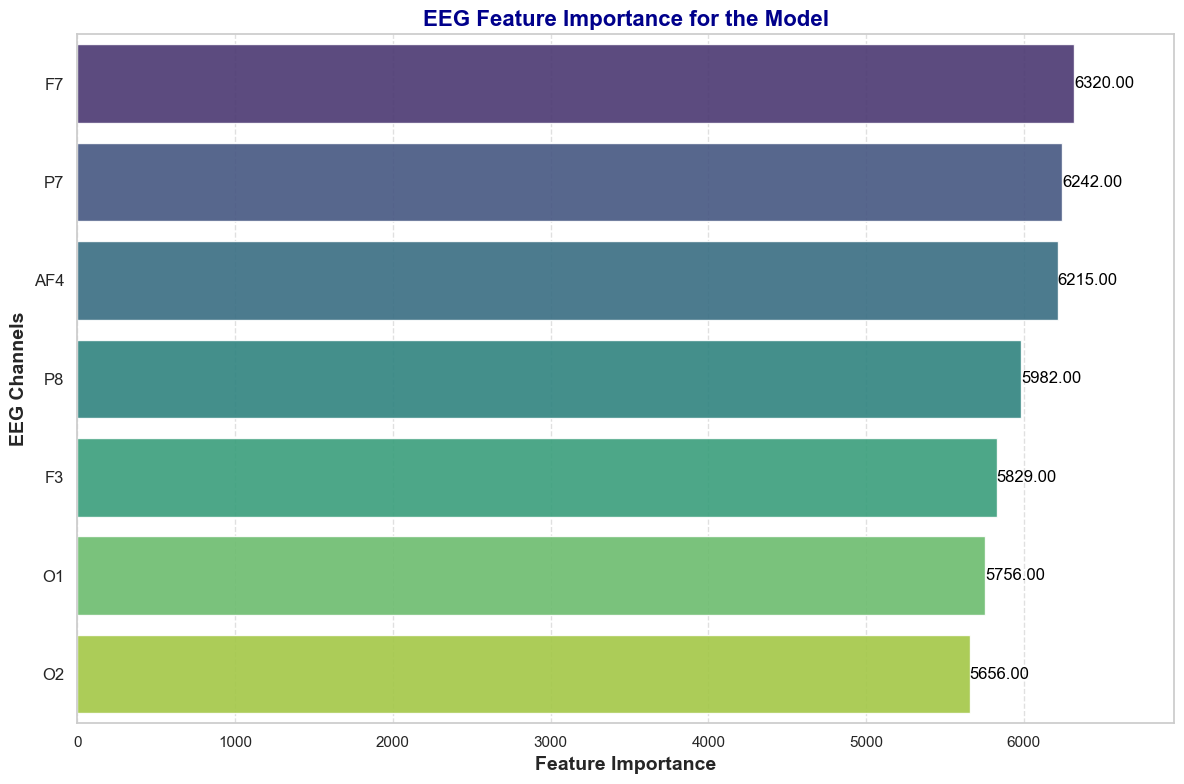

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set a more modern, aesthetic style using Seaborn
sns.set(style="whitegrid")

# Create a figure with a larger size for better visibility
plt.figure(figsize=(12, 8))

# Sort the indices of the features by importance (descending order)
sorted_idx = np.argsort(feature_importances)[::-1]

# Create the horizontal bar plot with vibrant colors and transparency
sns.barplot(
    x=feature_importances[sorted_idx],
    y=X.columns[sorted_idx],
    palette="viridis",
    alpha=0.9
)

# Add labels and title with custom fonts for better aesthetics
plt.xlabel("Feature Importance", fontsize=14, fontweight='bold')
plt.ylabel("EEG Channels", fontsize=14, fontweight='bold')
plt.title("EEG Feature Importance for the Model", fontsize=16, fontweight='bold', color='darkblue')

# Add gridlines for x-axis and set x-axis limits for better clarity
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.xlim(0, max(feature_importances) * 1.1)

# Improve y-axis readability by increasing label size
plt.yticks(fontsize=12)

# Add value annotations to each bar
for i, val in enumerate(feature_importances[sorted_idx]):
    plt.text(val + 0.01, i, f'{val:.2f}', va='center', fontsize=12, color='black')

# Show the plot
plt.tight_layout()
plt.show()

